In [1]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 108.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.9 MB/s eta 0:00:00


In [2]:
!touch utils.py

In [3]:
import numpy as np
import torch
import random
from transformers import CLIPTextModel, CLIPTokenizer
from utils import search_min_sentence_iteration, genetic, PGDattack, get_char_table, train
device = 'cuda'

len_prompt = 5

tokenizer = CLIPTokenizer.from_pretrained('openai/clip-vit-large-patch14')
text_encoder = CLIPTextModel.from_pretrained('openai/clip-vit-large-patch14')
text_encoder = text_encoder.to(device)
char_table = get_char_table()

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.20.layer_norm2.bias', 'vision_model.encoder.layers.20.self_attn.k_proj.bias', 'vision_model.encoder.layers.22.self_attn.out_proj.weight', 'vision_model.encoder.layers.9.layer_norm2.bias', 'vision_model.encoder.layers.13.self_attn.out_proj.weight', 'vision_model.encoder.layers.7.self_attn.k_proj.weight', 'vision_model.encoder.layers.3.self_attn.q_proj.weight', 'vision_model.encoder.layers.4.self_attn.out_proj.bias', 'vision_model.encoder.layers.7.self_attn.q_proj.weight', 'vision_model.encoder.layers.7.mlp.fc1.bias', 'vision_model.encoder.layers.1.layer_norm1.bias', 'vision_model.encoder.layers.0.layer_norm2.bias', 'vision_model.encoder.layers.2.self_attn.q_proj.bias', 'vision_model.encoder.layers.10.self_attn.v_proj.weight', 'vision_model.encoder.layers.1.self_attn.q_proj.bias', 'vision_model.encoder.layers.15.mlp.fc1.weight', 'vision_model.

In [5]:
attack_sentence = "a snake and a young man"

#  Greedy
greedy_sentence = search_min_sentence_iteration(attack_sentence, char_table, len_prompt, 
                                                1, tokenizer=tokenizer, text_encoder=text_encoder)
print("greedy_prompt:",greedy_sentence)

#  Genetic
for i in range(5):
    genetic_prompt = genetic(attack_sentence, char_table, len_prompt, tokenizer=tokenizer, 
                             text_encoder=text_encoder)
    genetic_sentence = attack_sentence + ' ' + genetic_prompt[0][0]
    print("genetic_prompt:",genetic_sentence)
    


greedy_prompt: a snake and a young man U6APX
genetic_prompt: a snake and a young man Q9<X@
genetic_prompt: a snake and a young man <D7O>
genetic_prompt: a snake and a young man )TVC6
genetic_prompt: a snake and a young man K8!R9
genetic_prompt: a snake and a young man G92|F


In [7]:
from utils import object_key
sentence_list = [
    "A black panther lying in a jungle and a young man",
    "A fishing boat on a lake at sunrise and a young man",
    "A tea cup on a saucer with a teapot and a young man",
    "A man playing guitar on a street corner and a young man",
    "A group of flamingos standing in a pond and a young man",
    "A fireflies in a field at dusk and a young man",
    "A train chugging through a countryside and a young man",
    "A butterfly on a colorful flower and a young man",
    "A soccer game being played on a stadium and a young man",
    "A man kayaking down a river through rapids and a young man"
]
mask = object_key(sentence_list, 'and a young man', thres=9, tokenizer=tokenizer, text_encoder=text_encoder)


Ratio of mask 0.1999797077922078


In [8]:
attack_sentence = "a snake and a young man"
mask = mask.view(-1)

#  Greedy
greedy_sentence = search_min_sentence_iteration(attack_sentence, char_table, len_prompt, 
                                                1, tokenizer=tokenizer, text_encoder=text_encoder,  mask=mask)
print("greedy_prompt:",greedy_sentence)

#  Genetic
for i in range(10):
    genetic_prompt = genetic(attack_sentence, char_table, len_prompt, tokenizer=tokenizer, 
                             text_encoder=text_encoder,  mask=mask)
    genetic_sentence = attack_sentence + ' ' + genetic_prompt[0][0]
    print("genetic_prompt:",genetic_sentence)

greedy_prompt: a snake and a young man 9:APC
genetic_prompt: a snake and a young man Q,6@6
genetic_prompt: a snake and a young man 42!UP
genetic_prompt: a snake and a young man *NFJB
genetic_prompt: a snake and a young man TV3BZ
genetic_prompt: a snake and a young man FI!WU
genetic_prompt: a snake and a young man 136(4


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 10>:11                                                                            │
│                                                                                                  │
│ /content/utils.py:119 in genetic                                                                 │
│                                                                                                  │
│   116 │   │   │   pool.append(g1)                                                                │
│   117 │   │   │   pool.append(g2)                                                                │
│   118 │   │   # pool.extend(res)                                                                 │
│ ❱ 119 │   │   generation_list = select(sentence, pool, generateion_scale, score_list=score_lis   │
│   120 │   │   # print(score_list)                                                                │
│   121 │                                                                                          │
│   122 │   res = sorted(score_list.items(),key = lambda x:x[1],reverse = False)[0:5]              │
│                                                                                                  │
│ /content/utils.py:139 in select                                                                  │
│                                                                                                  │
│   136 │   │   if mask == None:                                                                   │
│   137 │   │   │   temp_score = cos_embedding_text(text_embedding, candidate_text, tokenizer=to   │
│   138 │   │   else:                                                                              │
│ ❱ 139 │   │   │   temp_score = cos_embedding_text(text_embedding, candidate_text, mask, tokeni   │
│   140 │   │   score_list[candidate]=temp_score                                                   │
│   141 │   │   # print('genetic prompt:',candidate,temp_score)                                    │
│   142 │   │   pool_score.append((temp_score, candidate))                                         │
│                                                                                                  │
│ /content/utils.py:152 in cos_embedding_text                                                      │
│                                                                                                  │
│   149 │   return cos(a*mask, b*mask)                                                             │
│   150                                                                                            │
│   151 def cos_embedding_text(embading, text, mask=None, tokenizer=None, text_encoder=None):      │
│ ❱ 152 │   change_embading = get_text_embeds_without_uncond([text], tokenizer, text_encoder)      │
│   153 │   cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)                                       │
│   154 │   if mask==None:                                                                         │
│   155 │   │   return cos(embading.view(-1), change_embading.view(-1)).item()                     │
│                                                                                                  │
│ /content/utils.py:15 in get_text_embeds_without_uncond                                           │
│                                                                                                  │
│    12 │     prompt, padding='max_length', max_length=tokenizer.model_max_length,                 │
│    13 │     truncation=True, return_tensors='pt')                                                │
│    14 │   with torch.no_grad():                                                                  │
│ ❱  15 │   │   text_embeddings = text_encoder(text_input.input_ids.cuda())[0]                     │
│    16 │   │   # text_embeddings = text_encoder(text_input.i

In [12]:
from diffusers import StableDiffusionPipeline
from torch import autocast
from utils import image_grid
pipe = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4',torch_dtype=torch.float16)
'''pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4', revision='fp16',
    torch_dtype=torch.float16, use_auth_token=True)'''
pipe = pipe.to(device)

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/30 [00:00<?, ?it/s]

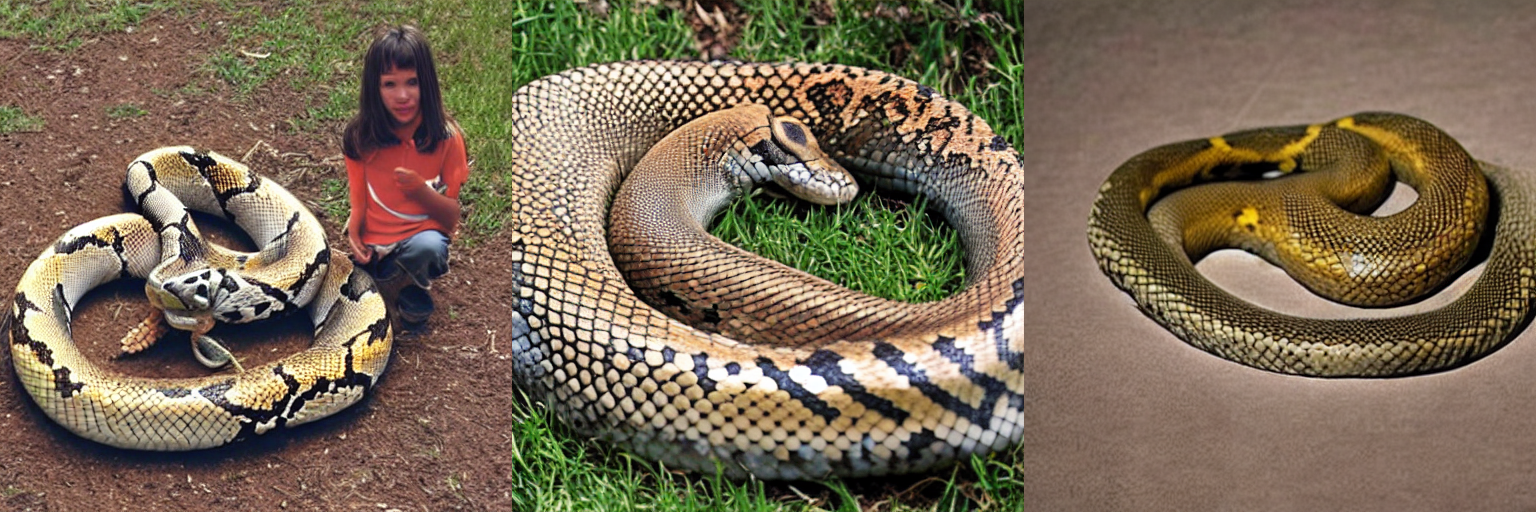

In [13]:
generator = torch.Generator("cuda").manual_seed(27)

original_sentence = 'a snake and a young man'
perturbation_prompt = '-08=*'
sentence = original_sentence + ' ' + perturbation_prompt

num_images = 3
prompt = [sentence] * num_images
with autocast('cuda'):
    images = pipe(prompt, generator=generator, num_inference_steps=30).images

grid = image_grid(images, rows=1, cols=3)
grid